In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from sklearn.datasets import make_blobs
import time
import scipy.stats as stats
from random import choice, shuffle
from string import ascii_lowercase, digits
from datetime import datetime
import random
import timeit

from scipy.stats import beta
from scipy.stats import betabinom, binom

In [2]:
# Set Parameters
n_samples = 10000
num_bins = 20
length_strings = 3
p=0.5
n_binomial = 100
n_discrete = 10
lambda_param = 4

In [3]:
def plot_distribution(dist, n_samples, title, num_bins):
    weights = np.ones_like(dist)/float(len(dist))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    fig.suptitle(title,fontsize=20)
    count, bins, ignored = ax1.hist(dist, num_bins, weights=weights)
    #ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
    ax1.set_title('Probability Distribution',fontsize=18)
    ax1.set_ylabel('Frequency',fontsize=16)
    ax1.set_xlabel('Value',fontsize=16)
    plt.setp(ax1.get_yticklabels(), fontsize=14)
    plt.setp(ax1.get_xticklabels(), fontsize=14)
    y = np.arange(0,n_samples)
    ax2.scatter(y,dist,s=10)
    ax2.set_title('Sample Values',fontsize=18)
    ax2.set_ylabel('Sample Value',fontsize=16)
    ax2.set_xlabel('Sample Number',fontsize=16)
    plt.setp(ax2.get_xticklabels(), fontsize=14)
    plt.setp(ax2.get_yticklabels(), fontsize=14)

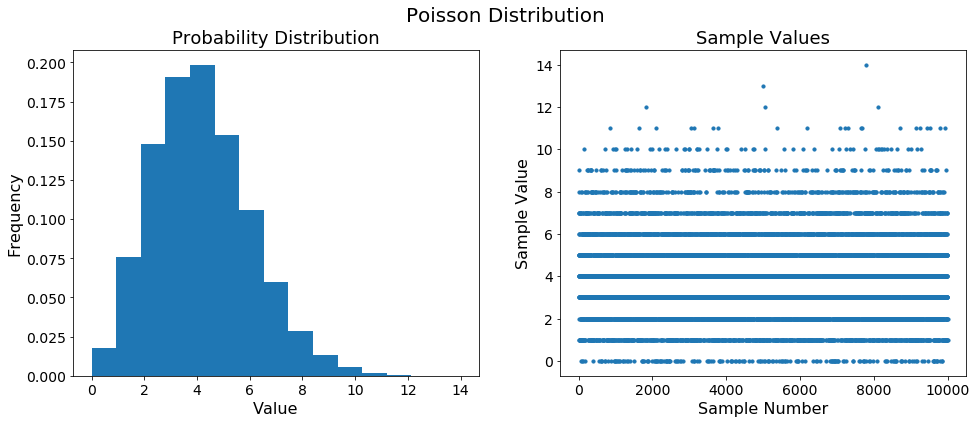

In [4]:
def poission_distribution(n_samples=n_samples, lambda_param=lambda_param, display = True):
    poission =  np.random.poisson(lambda_param, n_samples)
    if display==True:
        plot_distribution(poission, n_samples, "Poisson Distribution",15)
    return poission
poission = poission_distribution()

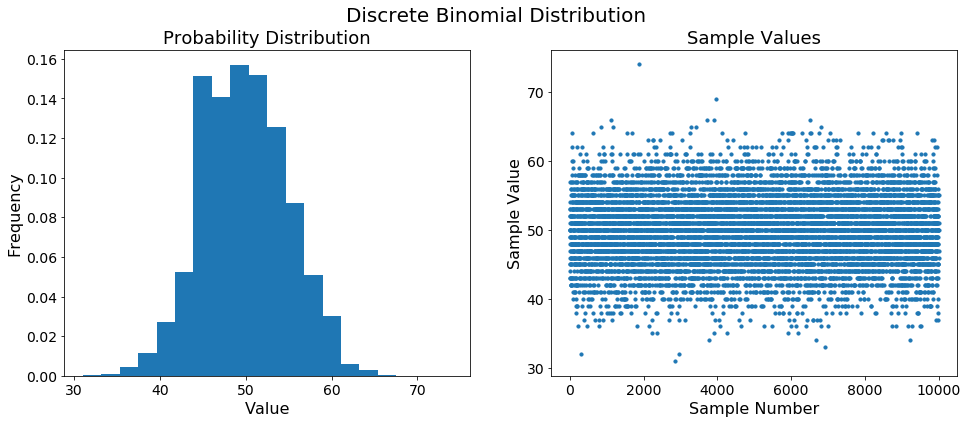

In [5]:
def discrete_binomial_distribution(n_samples=n_samples, p=p, n=n_binomial, display = True):
    discrete_binomial_distribution = binom.rvs(n, p, size=n_samples)
    if display==True:
        plot_distribution(discrete_binomial_distribution, n_samples, "Discrete Binomial Distribution", num_bins)
        
    return discrete_binomial_distribution
discrete_binomial = discrete_binomial_distribution()

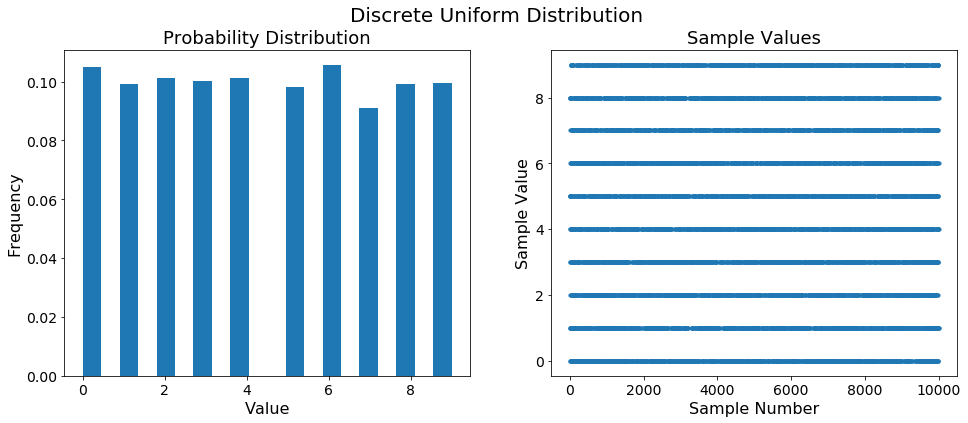

In [6]:
def discrete_uniform_distribution(n_samples=n_samples, n=n_discrete, display = True):
    discrete_uniform_distribution = np.random.randint(n, size=n_samples)
    
    if display == True:
        plot_distribution(discrete_uniform_distribution, n_samples, "Discrete Uniform Distribution", num_bins)
        
    return discrete_uniform_distribution
discrete_uniform = discrete_uniform_distribution()

In [7]:
def create_dates(n_samples=n_samples):
    sample_dates = pd.date_range(end = datetime.today(), periods = n_samples).to_pydatetime().tolist()
    shuffle(sample_dates)
    return sample_dates

In [8]:
def create_strings(n_samples=n_samples, length_strings=length_strings):
    chars = ascii_lowercase + digits
    sample_strings = [''.join(choice(chars) for _ in range(length_strings)) for _ in range(n_samples)]
    #print(lst)
    return sample_strings

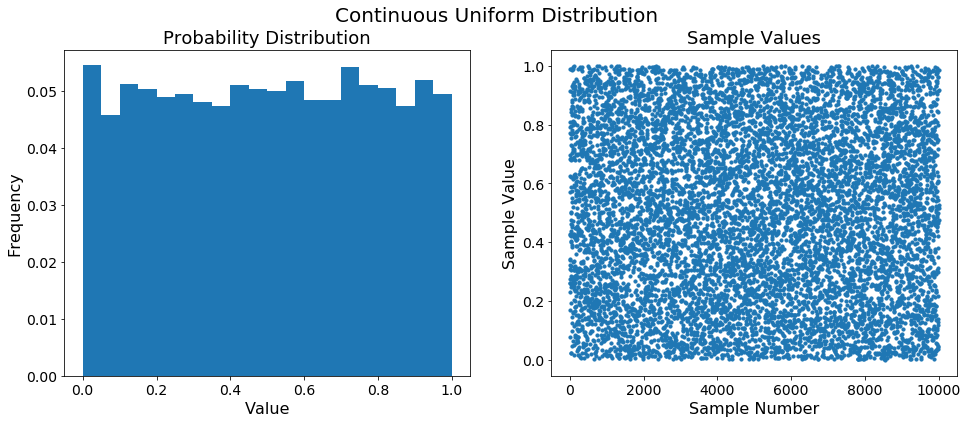

In [9]:
# Create uniform distribution
def uniform_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    sample_uniform = (np.random.uniform(low,high,n_samples))
    if display==True:
        plot_distribution(sample_uniform, n_samples, "Continuous Uniform Distribution", num_bins)
    return sample_uniform

sample_uniform=uniform_distribution()

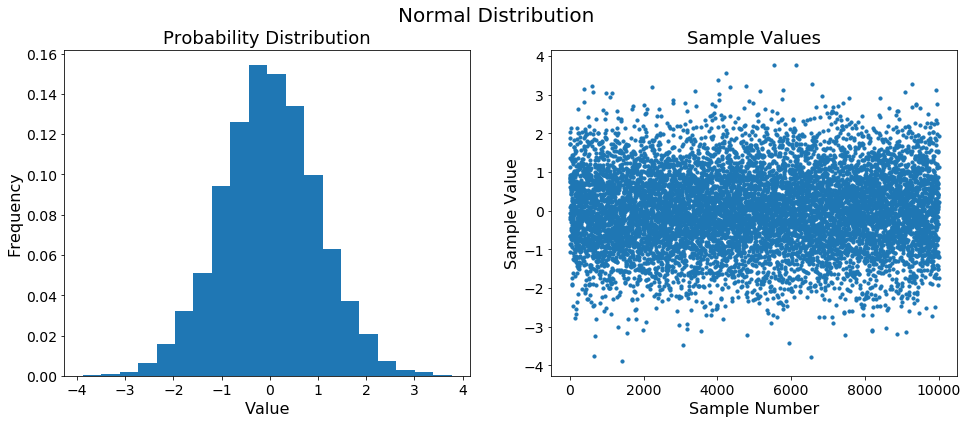

In [10]:
def normal_distribution(n_samples=n_samples, num_bins=num_bins, display = True, mu=0., sigma=1.):
    # Normal distribution
    sample_normal = np.random.normal(mu, sigma, n_samples)
    if display == True:
        plot_distribution(sample_normal, n_samples, "Normal Distribution", num_bins)
    return sample_normal

sample_normal = normal_distribution()

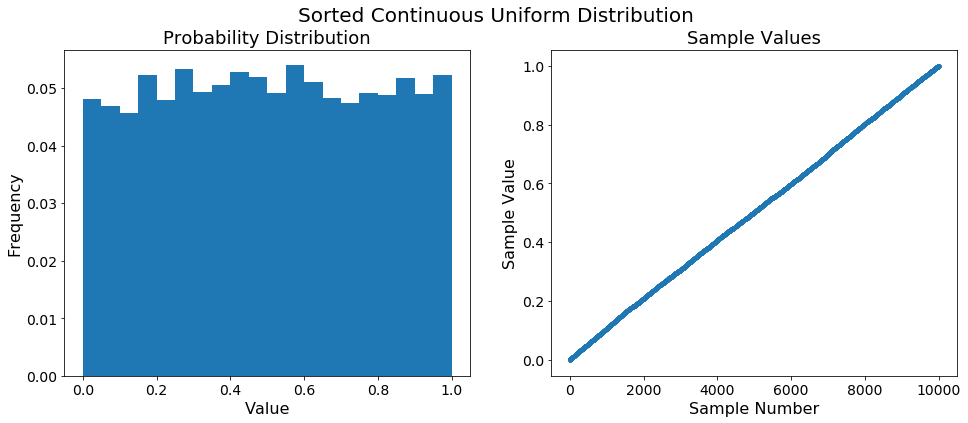

In [11]:
def uniform_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    #Sorted Uniform distribution
    sample_uniform_sorted = np.sort(np.random.uniform(low,high,n_samples))
    if display == True:
        plot_distribution(sample_uniform_sorted, n_samples, "Sorted Continuous Uniform Distribution", num_bins)
    return sample_uniform_sorted
sample_uniform_sorted = uniform_sorted_distribution()

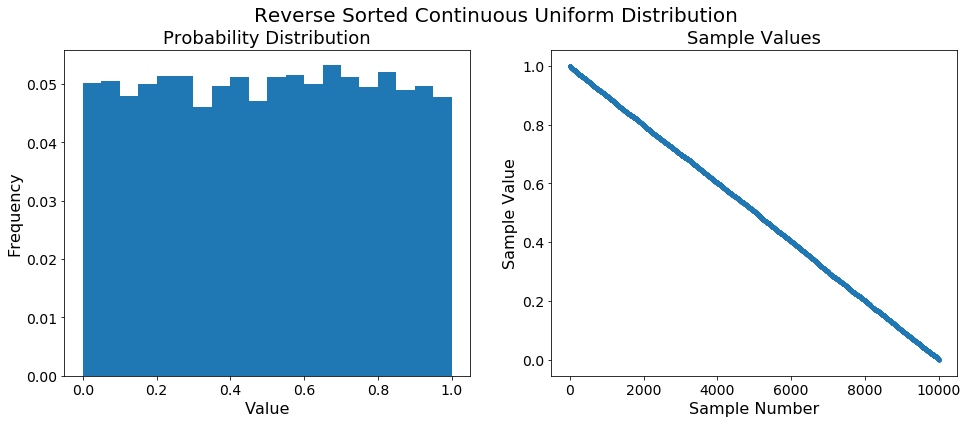

In [12]:
def uniform_reverse_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    # Reverse Sorted Uniform distribution
    sample_uniform_reverse_sorted = np.sort(np.random.uniform(low,high,n_samples))[::-1]
    if display == True:
        plot_distribution(sample_uniform_reverse_sorted, n_samples, "Reverse Sorted Continuous Uniform Distribution", num_bins)
    return sample_uniform_reverse_sorted
sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution()

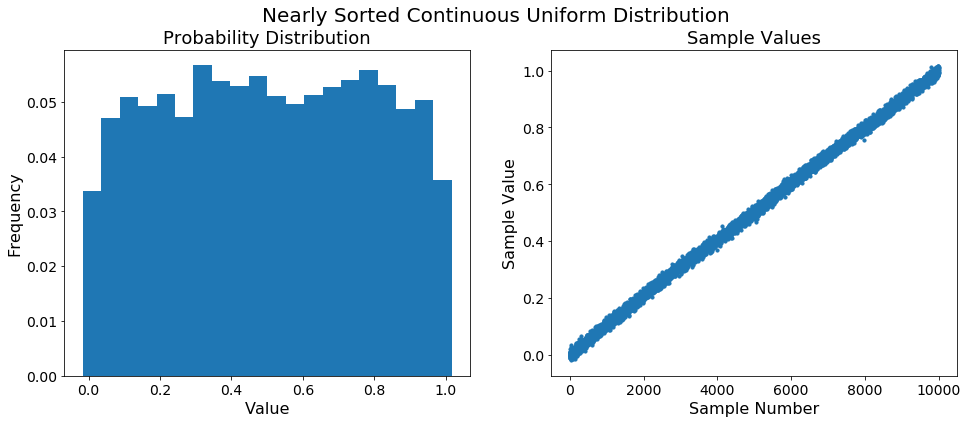

In [13]:
def uniform_nearly_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1., mean_noise= 0., std_noice = 0.01):
    # Nearly Uniform distribution
    sample_uniform_nearly_sorted = np.sort(np.random.uniform(low,high,n_samples))
    noise = np.random.normal(mean_noise,std_noice,n_samples)
    sample_uniform_nearly_sorted = sample_uniform_nearly_sorted + noise
    if display==True:
        plot_distribution(sample_uniform_nearly_sorted, n_samples, "Nearly Sorted Continuous Uniform Distribution", num_bins)
    return sample_uniform_nearly_sorted
sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution()

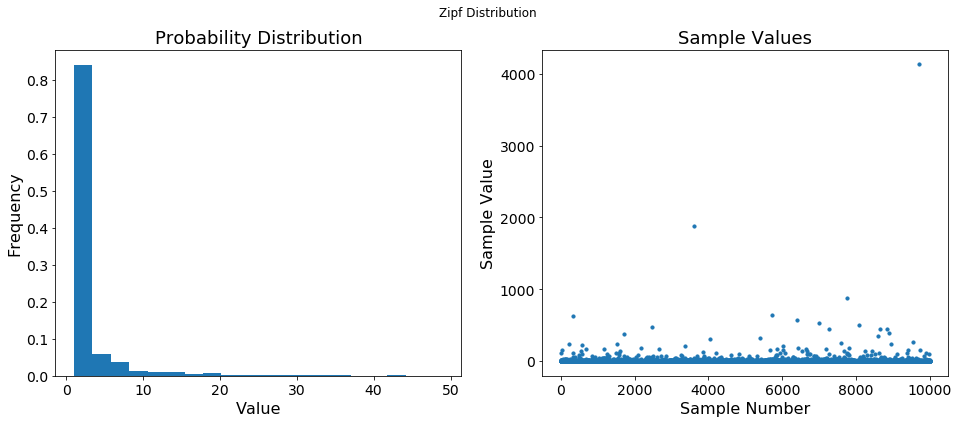

In [14]:
def zipf_distribution(n_samples=n_samples, num_bins=num_bins, display = True, a=2.):
    # ZipF Distribution
    sample_zipf = np.random.zipf(a, n_samples)
    if display==True:
        # Plot
        
        weights = np.ones_like(sample_zipf[sample_zipf<50])/float(len(sample_zipf[sample_zipf<50]))
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
        fig.suptitle('Zipf Distribution')
        count, bins, ignored = ax1.hist(sample_zipf[sample_zipf<50], 20, weights=weights)
        #ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax1.set_title('Probability Distribution',fontsize=18)
        ax1.set_ylabel('Frequency',fontsize=16)
        ax1.set_xlabel('Value',fontsize=16)
        plt.setp(ax1.get_yticklabels(), fontsize=14)
        plt.setp(ax1.get_xticklabels(), fontsize=14)
        y = np.arange(0,n_samples)
        ax2.scatter(y,sample_zipf,s=10)
        ax2.set_title('Sample Values',fontsize=18)
        ax2.set_ylabel('Sample Value',fontsize=16)
        ax2.set_xlabel('Sample Number',fontsize=16)
        plt.setp(ax2.get_xticklabels(), fontsize=14)
        plt.setp(ax2.get_yticklabels(), fontsize=14)

    return sample_zipf
sample_zipf = zipf_distribution()

In [15]:
def create_df_distribution(n_samples=n_samples, dist_type="Uniform"):
    df_distribion = pd.DataFrame().astype(np.float64)
    if dist_type == "Uniform":
        sample_uniform= uniform_distribution(display=False, n_samples=n_samples)
        df_distribion["Uniform"] = sample_uniform
    if dist_type == "Normal":
        sample_normal = normal_distribution(display=False, n_samples=n_samples)
        df_distribion["Normal"] = sample_normal
    if dist_type == "Uniform_Sorted":
        sample_uniform_sorted = uniform_sorted_distribution(display=False, n_samples=n_samples)
        df_distribion["Uniform_Sorted"] = sample_uniform_sorted
    if dist_type == "Uniform_Reverse_Sorted":
        sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution(display=False, n_samples=n_samples)
        df_distribion["Uniform_Reverse_Sorted"] = sample_uniform_reverse_sorted
    if dist_type == "Uniform_Nearly_Sorted":
        sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution(display=False, n_samples=n_samples)
        df_distribion["Uniform_Nearly_Sorted"] = sample_uniform_nearly_sorted
    if dist_type == "Zipf":
        sample_zipf = zipf_distribution(display=False, n_samples=n_samples)
        df_distribion["Zipf"] = sample_zipf
    if dist_type == "Dates":
        sample_dates = create_dates(n_samples=n_samples)
        df_distribion["Dates"] = sample_dates
    if dist_type == "Strings":
        sample_strings = create_strings(n_samples=n_samples)
        df_distribion["Strings"] = sample_strings
    if dist_type == "Discrete_Uniform":
        sample_discrete = discrete_uniform_distribution(n_samples=n_samples, n=n_discrete, display=False)
        df_distribion["Discrete_Uniform"] = sample_discrete
    if dist_type == "Discrete_Binomial":
        sample_bionmial = discrete_binomial_distribution(n_samples=n_samples, p=p, n=n_binomial, display=False)
        df_distribion["Discrete_Binomial"] = sample_bionmial
    if dist_type == "Poisson":
        poisson =  poission_distribution(n_samples=n_samples, lambda_param=lambda_param, display = False)
        df_distribion["Poisson"] = poisson
              
    return df_distribion

In [16]:
def quick_sort(df, columns):
    sorted_df = df.sort_values(columns, kind="quicksort")
    return sorted_df
def merge_sort(df, columns):
    sorted_df = df.sort_values(columns, kind="mergesort")
    return sorted_df
def heap_sort(df, columns):
    sorted_df = df.sort_values(columns, kind="heapsort")
    return sorted_df

choices = [quick_sort,merge_sort,heap_sort]
choices_names = ["quicksort","mergesort","heapsort"]

In [17]:
def evaluate_sorts(distribution_type="Uniform", second_col = None, repetitions=50):
    if second_col == None:
        measures = pd.DataFrame().astype(np.float64)
        for i, sorting_algorithm in enumerate(choices):
            algorithm_times = []
            for n in range(repetitions):
                distribion = create_df_distribution(n_samples=n_samples, dist_type=distribution_type)
                start_time = time.perf_counter()
                #sorted_df = distribion.sort_values([distribution_type],kind=sorting_algorithm)
                sorted_df = sorting_algorithm(distribion, [distribution_type])
                exeuction_time = (time.perf_counter() - start_time)
                algorithm_times.append(exeuction_time)
            measures[choices_names[i]] = algorithm_times
            print("The time of",choices_names[i], "is", np.mean(algorithm_times))
            print("It has a STD of", np.std(algorithm_times))
    else:
        measures = pd.DataFrame().astype(np.float64)
        for i, sorting_algorithm in enumerate(choices):
            algorithm_times = []
            for n in range(repetitions):
                distribion_1 = create_df_distribution(n_samples=n_samples, dist_type=distribution_type)
                distribion_2 = create_df_distribution(n_samples=n_samples, dist_type=second_col)
                df_distribions = pd.concat([distribion_1, distribion_2], axis=1)
                #print(df_distribions)
                start_time = time.perf_counter()
                #sorted_df = df_distribions.sort_values([distribution_type, second_col],kind=sorting_algorithm)
                sorted_df = sorting_algorithm(df_distribions, [distribution_type, second_col])
                exeuction_time = (time.perf_counter() - start_time)
                algorithm_times.append(exeuction_time)
            measures[choices_names[i]] = algorithm_times
            print("The time of",choices_names[i], "is", np.mean(algorithm_times))
            print("It has a STD of", np.std(algorithm_times))
    return measures

In [18]:
print("Discrete_Uniform")
df_discrete_uniform = evaluate_sorts(distribution_type="Discrete_Uniform")

Discrete_Uniform
The time of quicksort is 0.0009887300000004018
It has a STD of 0.000256844284539467
The time of mergesort is 0.0013212599999995688
It has a STD of 0.0003054301923523093
The time of heapsort is 0.0013676600000005123
It has a STD of 0.00031597814924455233


In [19]:
print("Discrete_Binomial")
df_discrete_binomial = evaluate_sorts(distribution_type="Discrete_Binomial")

Discrete_Binomial
The time of quicksort is 0.0010572680000001356
It has a STD of 0.00027494018217793836
The time of mergesort is 0.0012235160000001598
It has a STD of 0.00016598261518541182
The time of heapsort is 0.0014098619999998619
It has a STD of 0.00022764586874379734


In [20]:
print("Poisson")
df_poisson= evaluate_sorts(distribution_type="Poisson")

Poisson
The time of quicksort is 0.0009919040000002611
It has a STD of 0.00027025437495821963
The time of mergesort is 0.0012638080000002105
It has a STD of 0.00025030286122206
The time of heapsort is 0.0013626399999999705
It has a STD of 0.0002850869937402656


In [21]:
print("Dates")
df_dates = evaluate_sorts(distribution_type="Dates")

Dates
The time of quicksort is 0.0015250520000004996
It has a STD of 0.0003497872388977079
The time of mergesort is 0.0016221539999997957
It has a STD of 0.0003550827707508892
The time of heapsort is 0.0018846899999992671
It has a STD of 0.00021805351201013804


In [22]:
print("Strings")
df_strings = evaluate_sorts(distribution_type="Strings")

Strings
The time of quicksort is 0.008179817999999273
It has a STD of 0.0017091352782856017
The time of mergesort is 0.007367193999999557
It has a STD of 0.0009020624646685374
The time of heapsort is 0.011256649999999695
It has a STD of 0.0004946607209999424


In [23]:
print("Uniform")
df_uniform = evaluate_sorts(distribution_type="Uniform")

Uniform
The time of quicksort is 0.0014154920000004267
It has a STD of 0.00032657533577434334
The time of mergesort is 0.0014788059999996505
It has a STD of 0.0003175394661526544
The time of heapsort is 0.0015783980000004761
It has a STD of 3.670316874623065e-05


In [24]:
print("Normal")
df_normal = evaluate_sorts(distribution_type="Normal")

Normal
The time of quicksort is 0.001407750000000334
It has a STD of 0.00048626971990832024
The time of mergesort is 0.0013797639999998522
It has a STD of 0.00015192471393444474
The time of heapsort is 0.0016559879999998373
It has a STD of 0.00020947018560138844


In [25]:
print("Uniform_Sorted")
df_uniform_sorted = evaluate_sorts(distribution_type="Uniform_Sorted")

Uniform_Sorted
The time of quicksort is 0.0007297979999995618
It has a STD of 0.00024796036416332155
The time of mergesort is 0.0006138580000002492
It has a STD of 0.00014767155594723239
The time of heapsort is 0.0011615500000000624
It has a STD of 4.103989887910448e-05


In [26]:
print("Uniform_Reverse_Sorted")
df_uniform_reverse_sorted = evaluate_sorts(distribution_type="Uniform_Reverse_Sorted")

Uniform_Reverse_Sorted
The time of quicksort is 0.000828766000000769
It has a STD of 0.0005112728127362358
The time of mergesort is 0.0006012619999999913
It has a STD of 0.00011007992894247486
The time of heapsort is 0.0012104160000006915
It has a STD of 4.7259662969538435e-05


In [27]:
print("Uniform_Nearly_Sorted")
df_uniform_nearly_sorted = evaluate_sorts(distribution_type="Uniform_Nearly_Sorted")

Uniform_Nearly_Sorted
The time of quicksort is 0.0011654419999997856
It has a STD of 0.000388881664309306
The time of mergesort is 0.0010551639999998486
It has a STD of 9.087050733894958e-05
The time of heapsort is 0.0014348979999995492
It has a STD of 0.00017562874991357687


In [28]:
print("Zipf")
df_zipf = evaluate_sorts(distribution_type="Zipf")

Zipf
The time of quicksort is 0.0007911680000000842
It has a STD of 0.00010155944749769406
The time of mergesort is 0.0010270339999999577
It has a STD of 0.00016425563321871513
The time of heapsort is 0.000914064000000252
It has a STD of 4.19134764002643e-05


In [44]:
print("Zipf + Normal")
df_zipf_normal = evaluate_sorts(distribution_type="Zipf", second_col="Normal")

Zipf + Normal
The time of quicksort is 0.005014228000654839
It has a STD of 0.0005704411023942751
The time of mergesort is 0.005231317999860039
It has a STD of 0.0006878241886013088
The time of heapsort is 0.005361712000012631
It has a STD of 0.0006493757367987191


In [30]:
print("Zipf + Discrete_Binomial")
df_zipf_binomial = evaluate_sorts(distribution_type="Zipf", second_col="Discrete_Binomial")

Zipf + Discrete_Binomial
The time of quicksort is 0.0022696019999995085
It has a STD of 0.00027564182301641806
The time of mergesort is 0.0022407299999998996
It has a STD of 0.00018088339144275235
The time of heapsort is 0.002306931999999904
It has a STD of 0.00048545827933658503


In [31]:
print("Zipf + Discrete_Uniform")
df_zipf_discrete_uniform = evaluate_sorts(distribution_type="Zipf", second_col="Discrete_Uniform")

Zipf + Discrete_Uniform
The time of quicksort is 0.0023562059999999007
It has a STD of 0.000703993066843473
The time of mergesort is 0.0022235040000003893
It has a STD of 0.00023111249292053222
The time of heapsort is 0.0022071919999994806
It has a STD of 0.00029972114629457983


In [45]:
print("Zipf + Poisson")
df_zipf_poisson = evaluate_sorts(distribution_type="Zipf", second_col="Poisson")

Zipf + Poisson
The time of quicksort is 0.002329377999994904
It has a STD of 0.0004191948697178337
The time of mergesort is 0.002195462000236148
It has a STD of 0.00023295399775992713
The time of heapsort is 0.002639453999872785
It has a STD of 0.0006160839729971374


In [33]:
print("Zipf + Dates")
df_zipf_dates = evaluate_sorts(distribution_type="Zipf", second_col="Dates")

Zipf + Dates
The time of quicksort is 0.004910812000000249
It has a STD of 0.0004809836515474216
The time of mergesort is 0.004904480000001854
It has a STD of 0.00026995903096622905
The time of heapsort is 0.004910282000000734
It has a STD of 0.00019473804013659036


In [34]:
print("Zipf + Strings")
df_zipf_strings = evaluate_sorts(distribution_type="Zipf", second_col="Strings")

Zipf + Strings
The time of quicksort is 0.012022805999997957
It has a STD of 0.0007350953784132584
The time of mergesort is 0.01183593200000132
It has a STD of 0.0008876503024142639
The time of heapsort is 0.012217604000000791
It has a STD of 0.0006582297525816887


In [35]:
print("Discrete_Uniform + Poisson")
df_discrete_poisson = evaluate_sorts(distribution_type="Discrete_Uniform", second_col="Poisson")

Discrete_Uniform + Poisson
The time of quicksort is 0.0022364099999987275
It has a STD of 0.0007221626570945578
The time of mergesort is 0.00215170999999998
It has a STD of 0.00033079525646559984
The time of heapsort is 0.0020890040000000453
It has a STD of 0.00014965151514096346


In [36]:
print("Discrete_Uniform + Strings")
df_discrete_strings = evaluate_sorts(distribution_type="Discrete_Uniform", second_col="Strings")

Discrete_Uniform + Strings
The time of quicksort is 0.011857406000000025
It has a STD of 0.0007117893456383937
The time of mergesort is 0.011917431999999622
It has a STD of 0.0004831886879627597
The time of heapsort is 0.011640132000000279
It has a STD of 0.00026300640405687334


In [37]:
print("Discrete_Uniform + Uniform_Reverse_Sorted")
df_discrete_uniform_reverse_sorted = evaluate_sorts(distribution_type="Discrete_Uniform", second_col="Uniform_Reverse_Sorted")

Discrete_Uniform + Uniform_Reverse_Sorted
The time of quicksort is 0.003947026000000733
It has a STD of 0.0007317790420102544
The time of mergesort is 0.003749724000000185
It has a STD of 0.0003959755060916803
The time of heapsort is 0.0037634380000005764
It has a STD of 0.00021774107549081447


In [38]:
print("Discrete_Uniform + Uniform_Nearly_Sorted")
df_discrete_uniform_nearly_sorted = evaluate_sorts(distribution_type="Discrete_Uniform", second_col="Uniform_Nearly_Sorted")

Discrete_Uniform + Uniform_Nearly_Sorted
The time of quicksort is 0.004593110000000138
It has a STD of 0.0007168397241365804
The time of mergesort is 0.004535836000000018
It has a STD of 0.0004905328220450773
The time of heapsort is 0.004473821999999359
It has a STD of 0.0005209733069130738


In [46]:
def calculate_stats(df_dist, sort_algo):
    df_sort_algo = df_dist[sort_algo]
    std_sort_algo = np.std(df_sort_algo) 
    mean_sort_algo = np.mean(df_sort_algo) 
    return df_sort_algo, std_sort_algo,mean_sort_algo

def plot_runtimes(sort_dist, std_sort_algo, mean_sort_algo,algo_name):
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    fig.suptitle(algo_name)
    count, bins, ignored = ax1.hist(sort_dist, 20)
    ax2.plot(sort_dist)
    plt.show()
def plot_runtimes_together(df, bins = 5,title=None):
    weights_quicksort = np.ones_like(df["quicksort"])/float(len(df["quicksort"]))
    weights_mergesort = np.ones_like(df["mergesort"])/float(len(df["mergesort"]))
    weights_heapsort = np.ones_like(df["heapsort"])/float(len(df["heapsort"]))
    plt.figure(figsize=(16,6))
    plt.hist(df["quicksort"], bins, alpha = 0.5, label='quick sort',weights=weights_quicksort)
    plt.hist(df["mergesort"], bins, alpha = 0.5, label='merge sort',weights=weights_mergesort)
    plt.hist(df["heapsort"], bins, alpha = 0.5, label='heap sort',weights=weights_heapsort)
    plt.legend(loc='upper right',fontsize=16)
    plt.title(title,fontsize=20)
    plt.ylabel("Frequency",fontsize=16)
    plt.xlabel("Runtime in seconds",fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

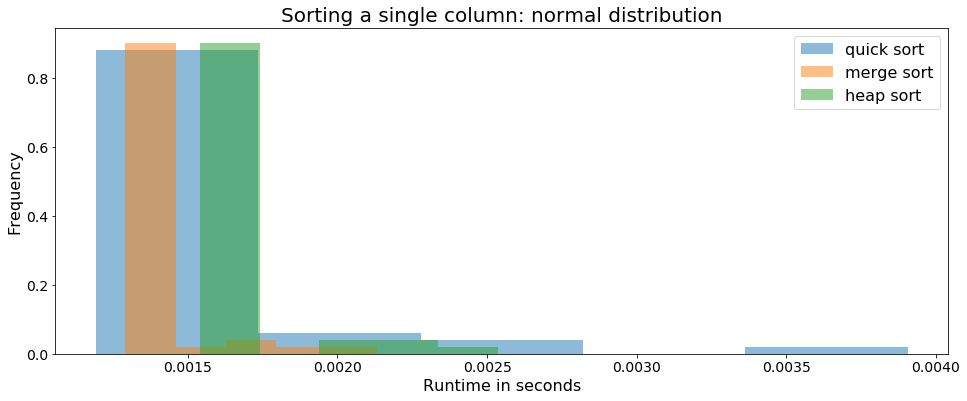

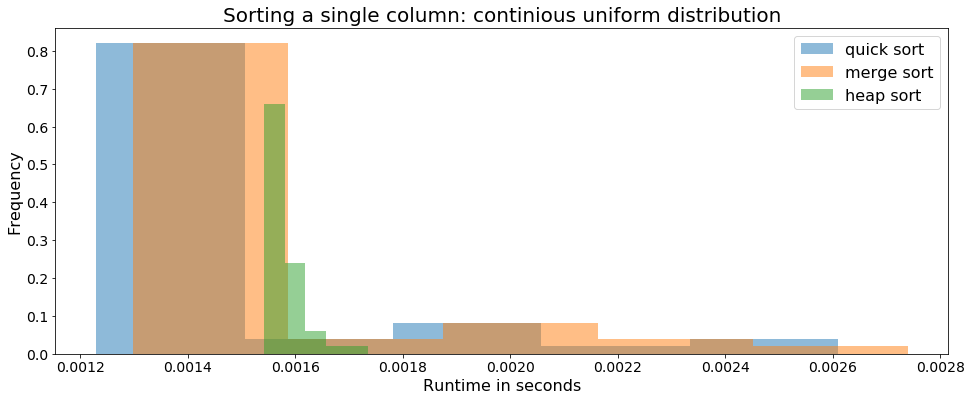

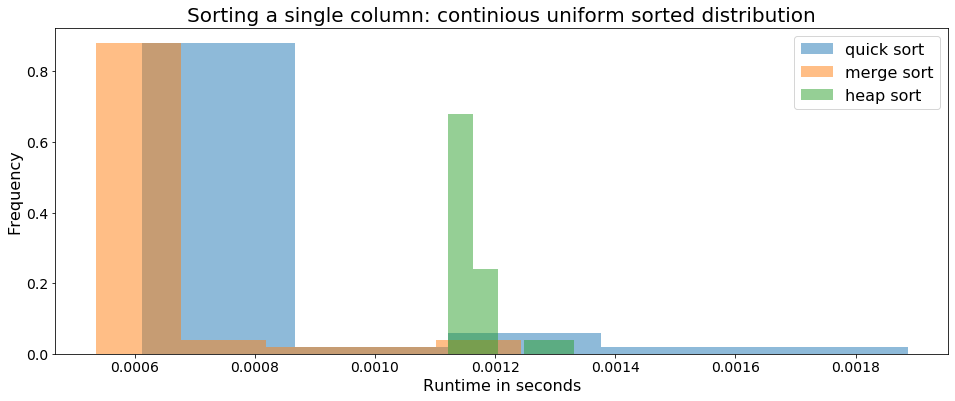

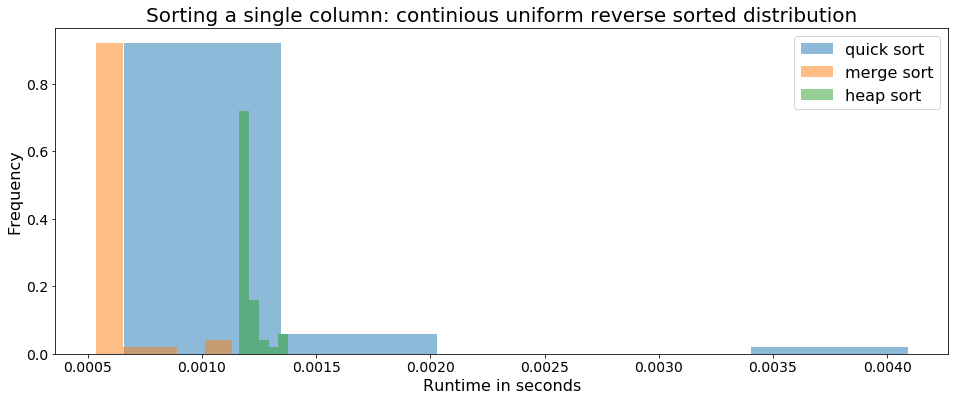

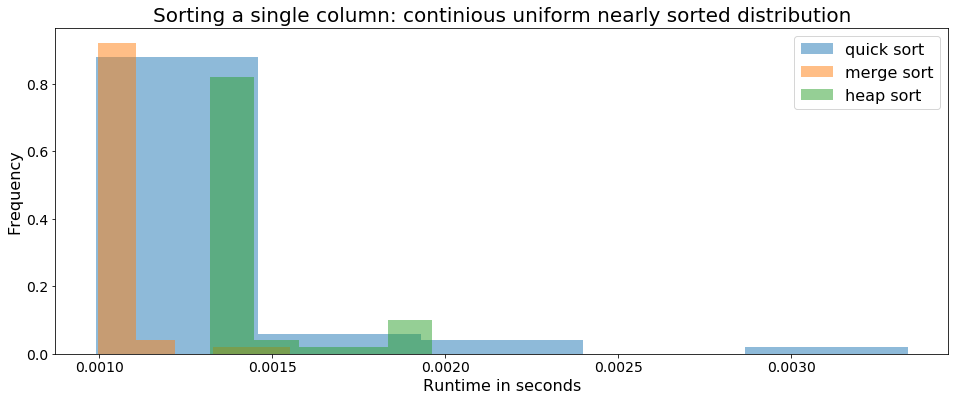

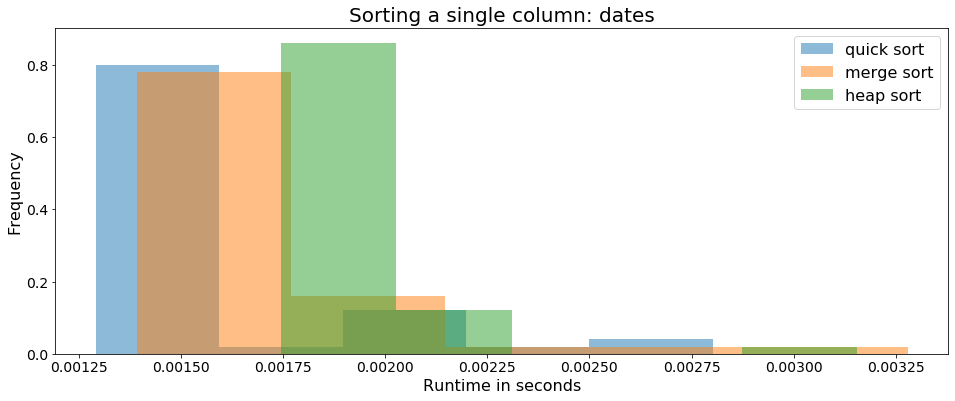

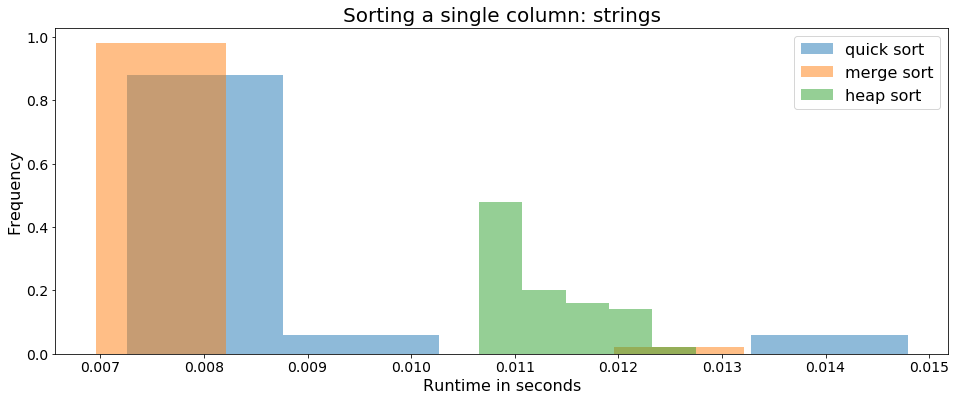

In [47]:
plot_runtimes_together(df_normal, title="Sorting a single column: normal distribution")
plot_runtimes_together(df_uniform, title="Sorting a single column: continious uniform distribution")
plot_runtimes_together(df_uniform_sorted, title="Sorting a single column: continious uniform sorted distribution")
plot_runtimes_together(df_uniform_reverse_sorted, title="Sorting a single column: continious uniform reverse sorted distribution")
plot_runtimes_together(df_uniform_nearly_sorted, title="Sorting a single column: continious uniform nearly sorted distribution")
plot_runtimes_together(df_dates, title="Sorting a single column: dates")
plot_runtimes_together(df_strings, title="Sorting a single column: strings")

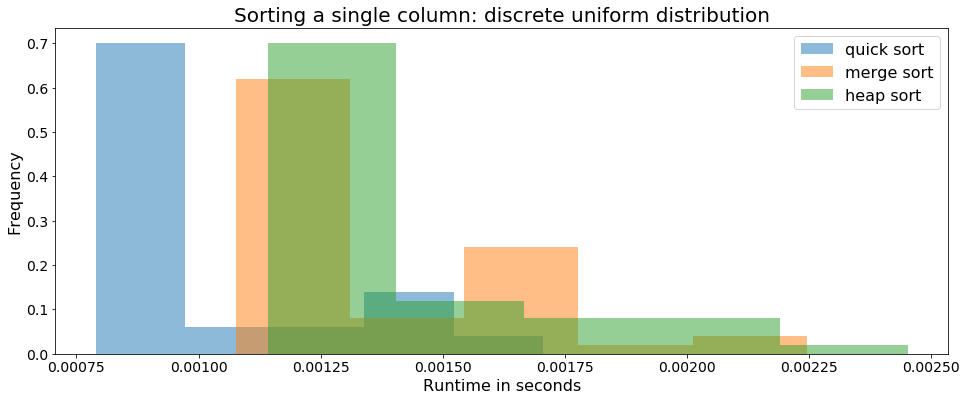

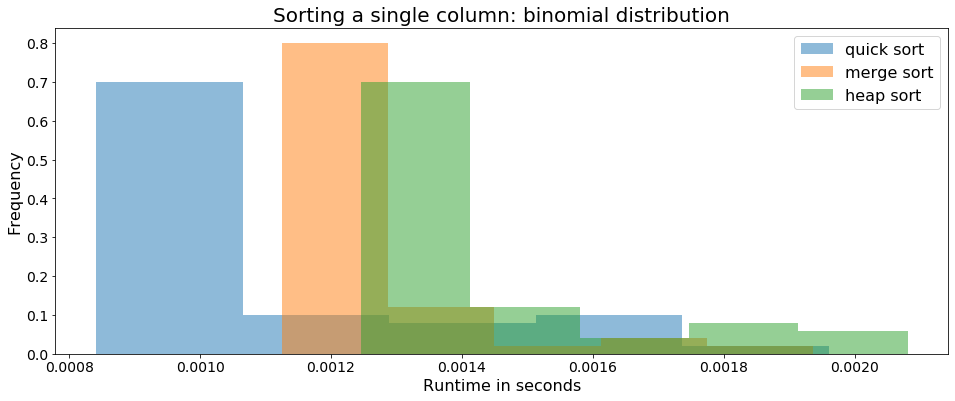

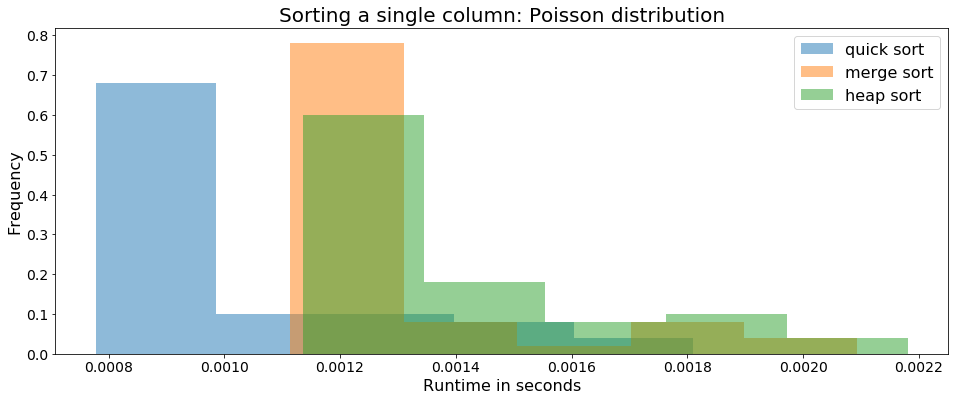

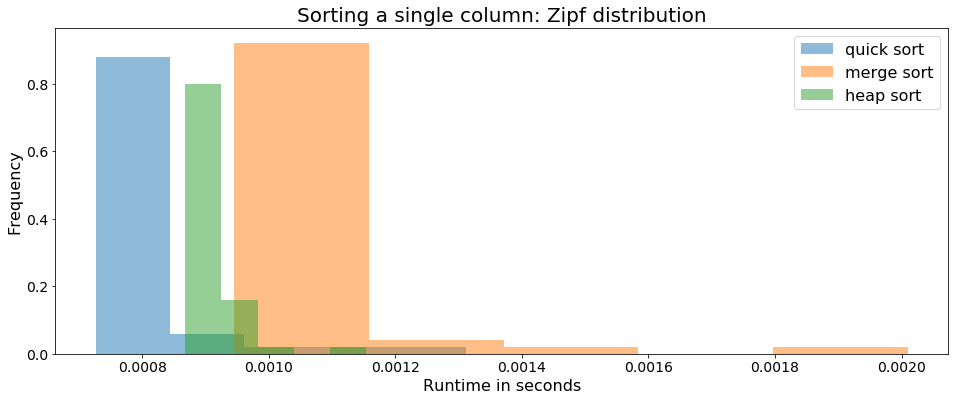

In [48]:
plot_runtimes_together(df_discrete_uniform, title="Sorting a single column: discrete uniform distribution")
plot_runtimes_together(df_discrete_binomial, title="Sorting a single column: binomial distribution")
plot_runtimes_together(df_poisson, title="Sorting a single column: Poisson distribution")
plot_runtimes_together(df_zipf, title="Sorting a single column: Zipf distribution")

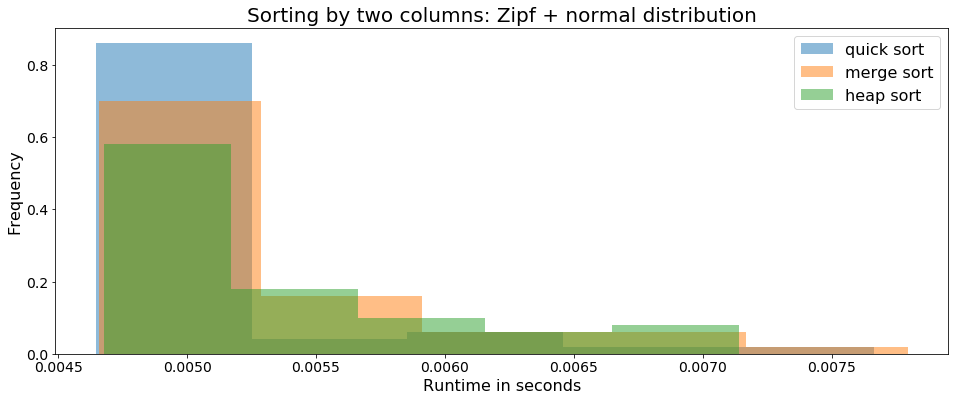

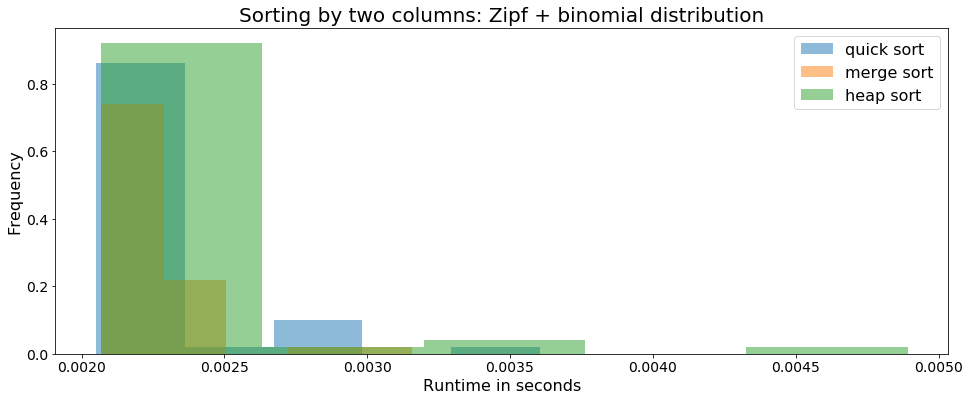

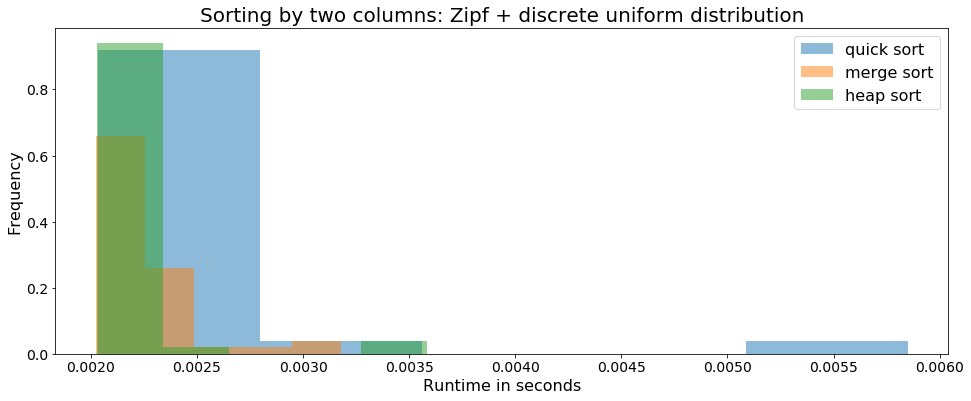

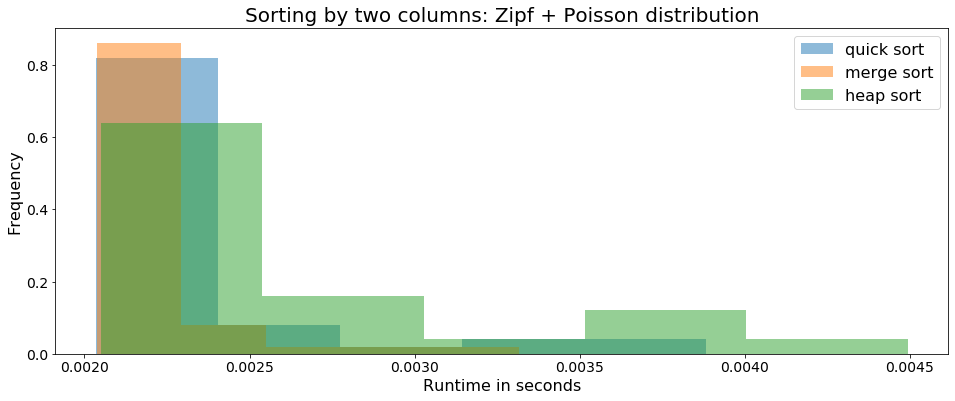

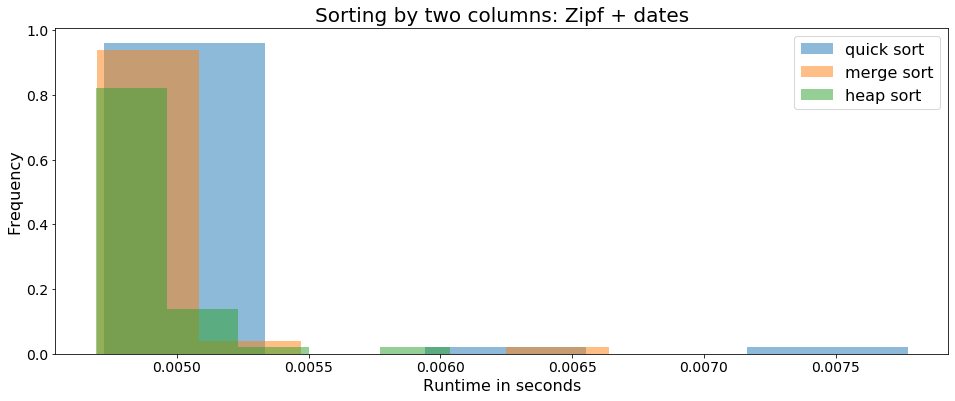

In [49]:
plot_runtimes_together(df_zipf_normal, title="Sorting by two columns: Zipf + normal distribution")
plot_runtimes_together(df_zipf_binomial, title="Sorting by two columns: Zipf + binomial distribution")
plot_runtimes_together(df_zipf_discrete_uniform, title="Sorting by two columns: Zipf + discrete uniform distribution")
plot_runtimes_together(df_zipf_poisson, title="Sorting by two columns: Zipf + Poisson distribution")
plot_runtimes_together(df_zipf_dates, title="Sorting by two columns: Zipf + dates")

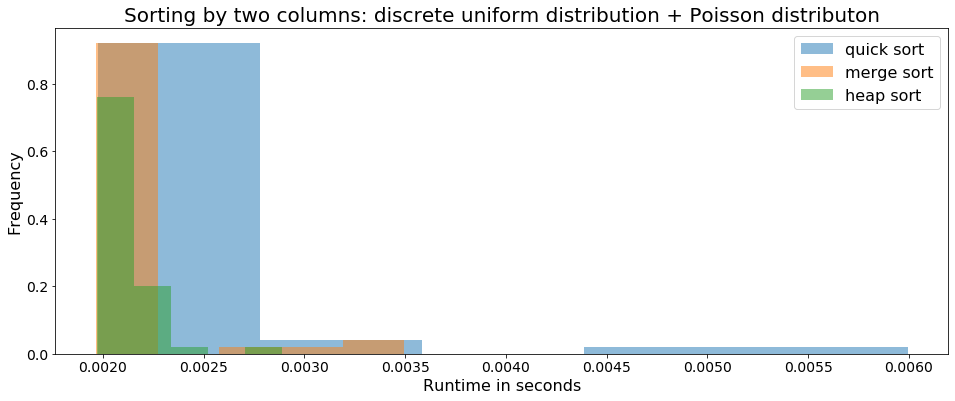

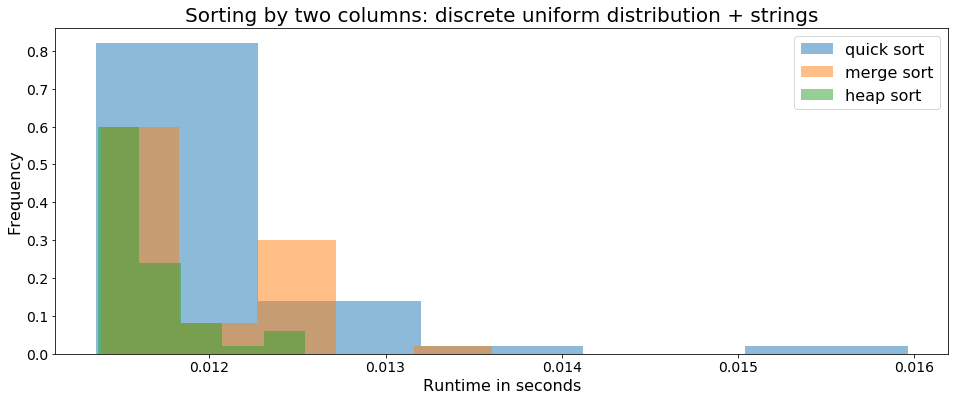

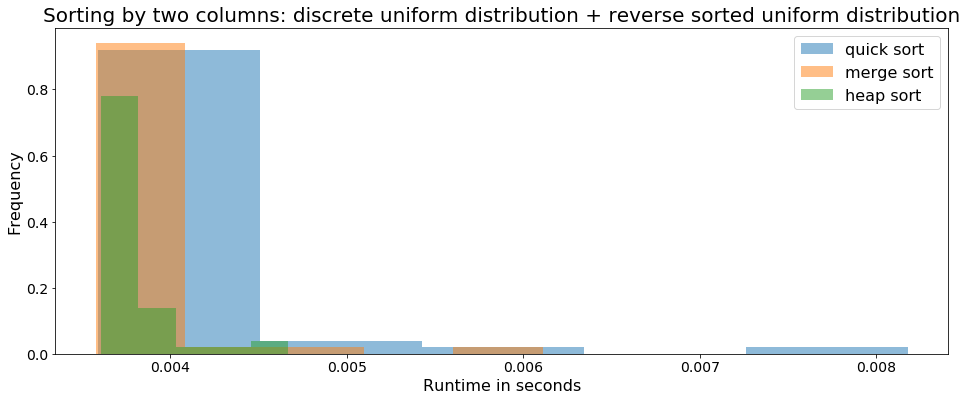

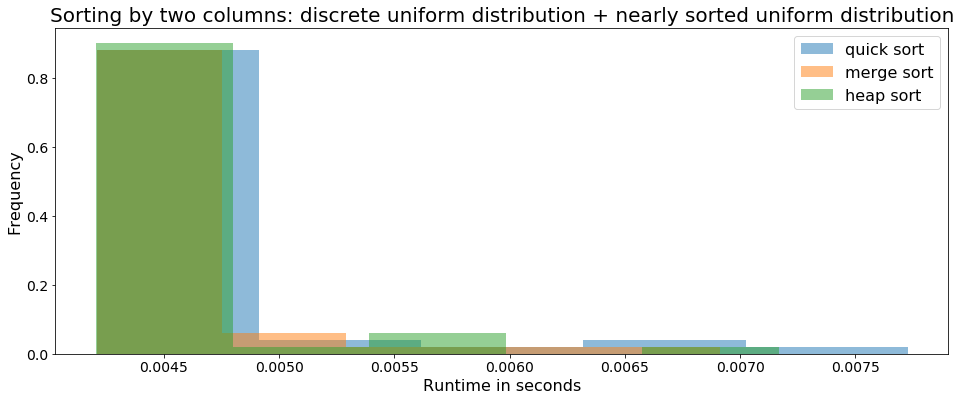

In [50]:
plot_runtimes_together(df_discrete_poisson, title="Sorting by two columns: discrete uniform distribution + Poisson distributon")
plot_runtimes_together(df_discrete_strings, title="Sorting by two columns: discrete uniform distribution + strings")
plot_runtimes_together(df_discrete_uniform_reverse_sorted, title="Sorting by two columns: discrete uniform distribution + reverse sorted uniform distribution")
plot_runtimes_together(df_discrete_uniform_nearly_sorted, title="Sorting by two columns: discrete uniform distribution + nearly sorted uniform distribution")